In [4]:
pip install pyserial

Note: you may need to restart the kernel to use updated packages.


In [5]:
# DISPLAY ROUTINE
from IPython.display import clear_output
from matplotlib import pyplot as plt
import numpy as np
import collections
%matplotlib inline

def live_plot(data_dict, figsize=(7,5), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    for label,data in data_dict.items():
        plt.plot(MHZ,data[0], label=label)
    plt.title(title)
    plt.grid(True)
    plt.xlabel('MHz')
    #plt.legend(loc='center left') # the plot evolves to the right
    plt.show();

In [6]:
# MHZ RANGE FOR GRAPHS
MHZ=[]
for i in range(128):
    MHZ.append(2614+i*4) 

In [7]:
# NUMBER OF SAMPLES
maxsamples=200
#use 500 for reference graphs
#maxsamples=500 

In [8]:
# BASELINE CONSTRUCTION ---- LED OFF!!
import serial
import numpy as np
import matplotlib.pyplot as plt

ser = serial.Serial(
    port='/dev/cu.usbserial-210',
    baudrate=115200,
    parity=serial.PARITY_ODD,
    stopbits=serial.STOPBITS_TWO,
    bytesize=serial.SEVENBITS,
    timeout=2
)

mydata = collections.defaultdict(list)

count=0
all_data_noled=[]
meanval=np.zeros(128)
print("TURN LED OFF AND PRESS RESET BUTTON ON DEVICE")

for i in range(maxsamples):
    out = ser.readline()
    if out == b'LOOP\r\n':
        print("got it!")
        data=np.zeros(128)
        for j in range(128):
            line=ser.readline()
            if line!=b'LOOP\r\n':
                val=int(line)
                data[j]=val
            else:
                print(j,val)
        count+=1
        all_data_noled.append(np.array(data))
        meanval=np.array(meanval)+np.array(data)
        mydata['signal'].append(meanval/count)
        live_plot(mydata)
        mydata['signal']=[]
    else:
        print(out)

ser.close()

SerialException: [Errno 2] could not open port /dev/cu.usbserial-210: [Errno 2] No such file or directory: '/dev/cu.usbserial-210'

In [9]:
#MEDIAN CALCULATION
median_data_noled=np.mean(np.array(all_data_noled), axis=0)
std_data_noled=np.std(np.array(all_data_noled), axis=0)

NameError: name 'all_data_noled' is not defined

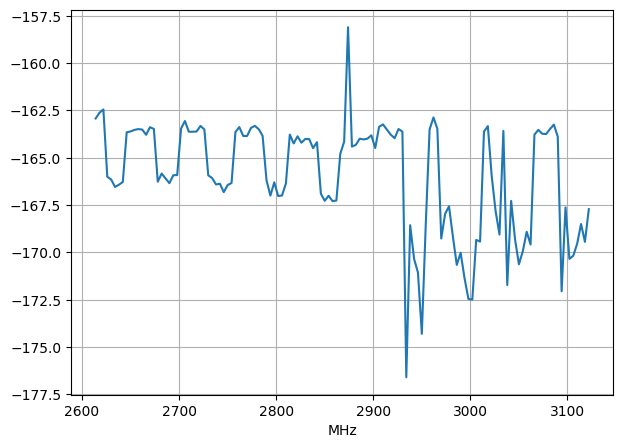

In [8]:
#ACTUAL SIGNAL ACQUISITION

import serial
import numpy as np
import matplotlib.pyplot as plt

ser = serial.Serial(
    port='/dev/cu.usbserial-210',
    baudrate=115200,
    parity=serial.PARITY_ODD,
    stopbits=serial.STOPBITS_TWO,
    bytesize=serial.SEVENBITS,
    timeout=2
)

mydata = collections.defaultdict(list)

count=0
meanval=np.zeros(128)
print("PRESS RESET BUTTON ON DEVICE")

for i in range(maxsamples):
    out = ser.readline()
    if out == b'LOOP\r\n':
        print("got it!")
        data=np.zeros(128)
        for j in range(128):
            line=ser.readline()
            if line!=b'LOOP\r\n':
                val=int(line)
                data[j]=val
            else:
                print(j,val)
        count+=1
        meanval=np.array(meanval)+np.array(data)-np.array(median_data_noled)
        mydata['signal'].append(meanval/count)
        live_plot(mydata)
        mydata['signal']=[]
    else:
        print(out)

ser.close()

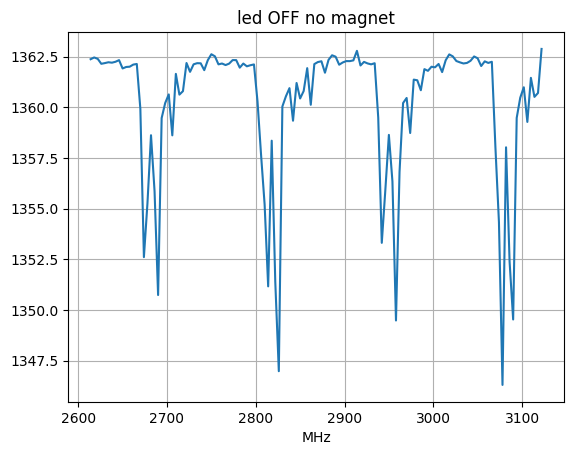

In [125]:
# SAVE A PDF PLOT
plt.plot(MHZ,meanval/count)
plt.grid(True)
plt.xlabel('MHz')
plt.title("led ON no magnet")
plt.savefig("led_ON_no_mag_200.pdf")
plt.show()

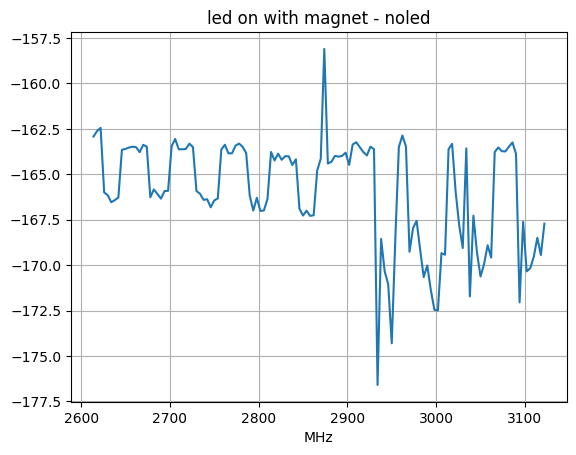

In [9]:
plt.plot(MHZ,meanval/count)
plt.grid(True)
plt.xlabel('MHz')
plt.title("led on with magnet - noled")
plt.savefig("led_on_with_mag_mnoled_500.pdf")
plt.show()